Confusion Matrix:
[[7031  272]
 [ 428  507]]

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.96      0.95      7303
        True       0.65      0.54      0.59       935

    accuracy                           0.92      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.92      0.91      8238


Accuracy Score: 0.9150279193979121


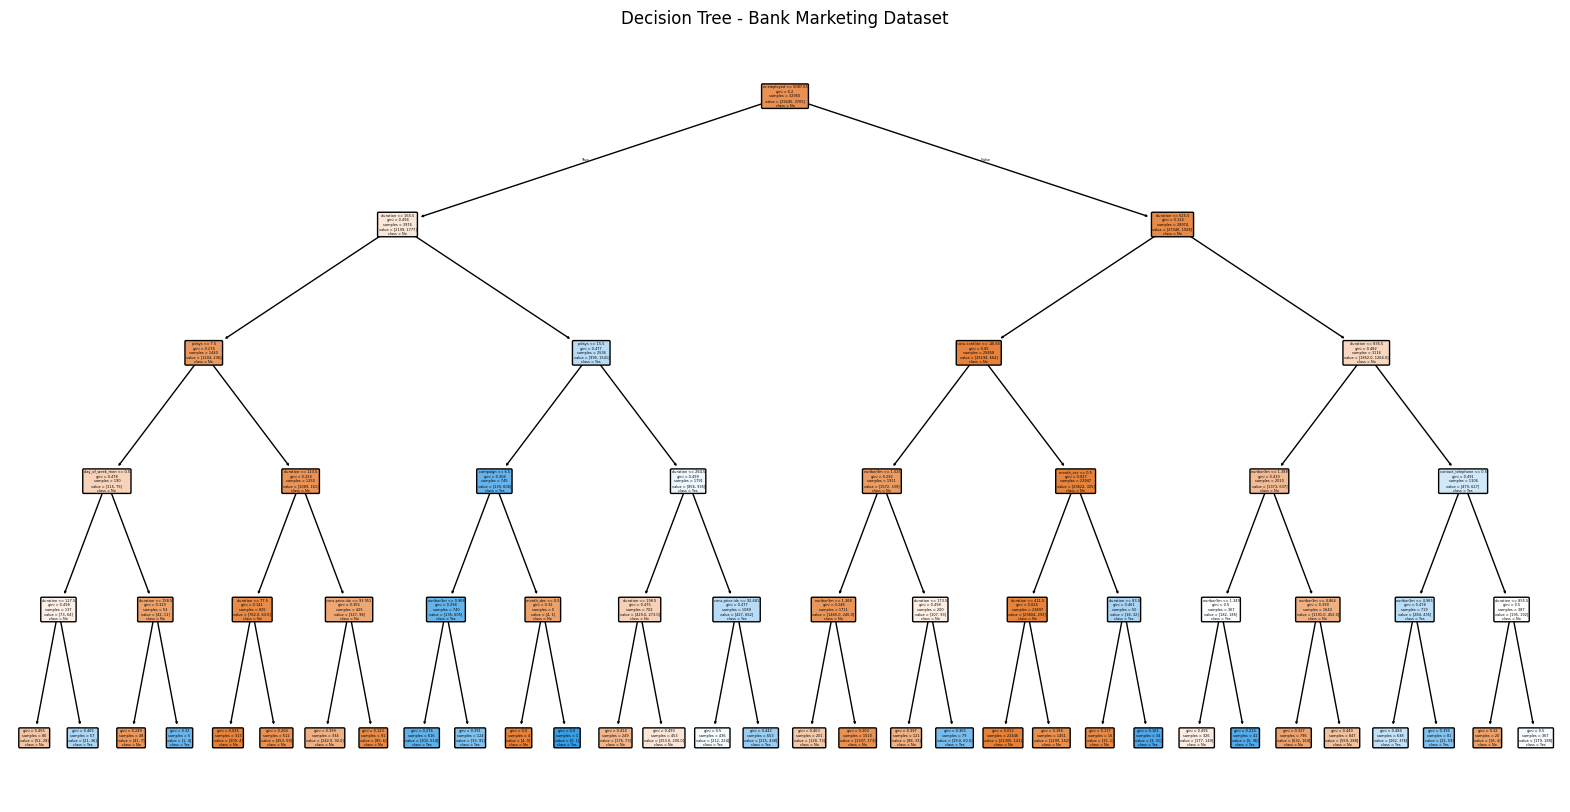

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile
import requests
import io

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
response = requests.get(url)

with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open("bank-additional/bank-additional-full.csv") as f:
        df = pd.read_csv(f, sep=';')

df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["No", "Yes"], rounded=True)
plt.title("Decision Tree - Bank Marketing Dataset")
plt.savefig("decision_tree_plot.png")
plt.show()

import joblib
joblib.dump(clf, 'decision_tree_model.pkl')

with open("classification_report.txt", "w") as f:
    f.write(classification_report(y_test, y_pred))
